# 2. Breast cancer 

PCA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 불러오기

In [3]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
df = pd.DataFrame(breast.data, columns=breast.feature_names)
df['target'] = breast.target
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


- 정규화

In [4]:
from sklearn.preprocessing import StandardScaler
breast_std = StandardScaler().fit_transform(breast.data)

- PCA 차원축소 (2, 5, 10)

In [5]:
# 2차원으로 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
breast_pca = pca.fit_transform(breast_std)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [6]:
# 5차원으로 축소

pca2 = PCA(n_components=5)
breast_pca2 = pca2.fit_transform(breast_std)
breast_pca2[:5]
pca2.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [7]:
# 10차원으로 축소

pca3 = PCA(n_components=10)
breast_pca3 = pca3.fit_transform(breast_std)
breast_pca3[:5]
pca3.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

- PCA 전후 비교

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
# Train/Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    breast_std, breast.target, stratify=breast.target, random_state=2021
)

In [10]:
# Logistic 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2021)
lr.fit(X_train, y_train)

LogisticRegression(random_state=2021)

In [11]:
lr.coef_, lr.intercept_

(array([[-0.38562354, -0.34262207, -0.36413343, -0.41168842, -0.125392  ,
          0.53427855, -0.57868168, -0.85019026,  0.08724313,  0.2574702 ,
         -1.06464785,  0.20019118, -0.74749809, -0.84878727, -0.27163866,
          0.58431601,  0.06165371, -0.36110527,  0.42706156,  0.66294691,
         -1.01272202, -1.1987033 , -0.86629684, -0.96940075, -0.66452609,
          0.00882768, -0.84903123, -0.74604926, -0.72522438, -0.52639092]]),
 array([0.29535933]))

In [12]:
lr.score(X_test, y_test)

0.993006993006993

In [13]:
# 2차원으로 축소
# 학습/테스트 데이터셋 분류

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    breast_pca, breast.target, stratify=breast.target, random_state=2021
)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9440559440559441

In [15]:
# 5차원으로 축소
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    breast_pca2, breast.target, stratify=breast.target, random_state=2021
)

In [16]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

0.993006993006993

In [17]:
# 10차원으로 축소
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    breast_pca3, breast.target, stratify=breast.target, random_state=2021
)

In [18]:
from sklearn.linear_model import LogisticRegression
lr3 = LogisticRegression()
lr3.fit(X_train, y_train)
lr3.score(X_test, y_test)

0.986013986013986

- Code Refactoring

In [19]:
def pca_accuracy(X,y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=2021
    )
    lr = LogisticRegression(random_state=2021)
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    return round(score, 4)

In [20]:
for n in [30, 2, 5, 10]: 
    pca = PCA(n_components=n)
    cancer_pca = pca.fit_transform(breast_std)
    explained = sum(pca.explained_variance_ratio_)
    acc = pca_accuracy(breast_pca, breast.target)
    print(f'PCA {n} - 설명력 : {explained:.4f}, 정확도 : {acc:.4f}')

PCA 30 - 설명력 : 1.0000, 정확도 : 0.9441
PCA 2 - 설명력 : 0.6324, 정확도 : 0.9441
PCA 5 - 설명력 : 0.8473, 정확도 : 0.9441
PCA 10 - 설명력 : 0.9516, 정확도 : 0.9441


- 시각화

In [22]:
pca = PCA(n_components=2)
breast_pca = pca.fit_transform(breast_std)
df["PC1"] = breast_pca[:,0]
df['PC2'] = breast_pca[:,1]

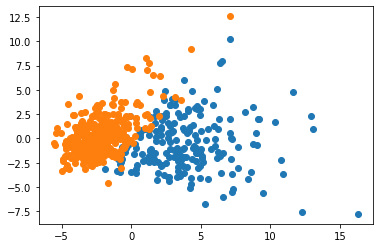

In [23]:
for i in range(2):
    x_data = df[df.target == i]["PC1"]
    y_data = df[df.target == i]["PC2"]
    plt.scatter(x_data, y_data, label = breast.target_names[i])